In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from read_path_module import read_data_relative_path
from write_path_module import write_data_relative_path

### - Import the dataset

In [2]:
df = read_data_relative_path('./data/CDC_Natality/2003_2018.csv', data_type='csv')

### - Create pandas datetime column

In [3]:
df['DT'] = pd.to_datetime(df['Year'].astype(str)  + df['Month Code'].astype(str), format='%Y%m')
df.sample(2)

,Notes,Year,Year Code,Month,Month Code,State,State Code,County,County Code,Births,Average Age of Mother,Average LMP Gestational Age,DT
58623,NaN,2011,2011,February,2,North Carolina,37,"Forsyth County, NC",37067,370.0,27.27,38.44,2011-02-01
18534,NaN,2005,2005,September,9,Massachusetts,25,"Essex County, MA",25009,765.0,29.26,38.59,2005-09-01


### - Clean, reorder, and create new columns

In [4]:
df['State Acronym'] = df['County'][0][-2:]
df[['CTY','temp']] = df['County'].str.split(',', expand=True)
df.drop(columns=['temp'], inplace=True)

df.sample(3)

df.columns.to_list()

col_lst = ['Year',
           'Month',
           'Month Code',
           'DT',
           'State',
           'State Acronym',
           'State Code',
           'County',
           'CTY',
           'County Code',
           'Births',
           'Average Age of Mother',
           'Average LMP Gestational Age',
           'Notes']

df = df[col_lst]
del col_lst
df.sample(3)

,Year,Month,Month Code,DT,State,State Acronym,State Code,County,CTY,County Code,Births,Average Age of Mother,Average LMP Gestational Age,Notes
102744,2016,December,12,2016-12-01,Texas,AL,48,"Nueces County, TX",Nueces County,48355,391.0,27.26,38.26,NaN
88423,2015,February,2,2015-02-01,California,AL,6,"San Bernardino County, CA",San Bernardino County,6071,2270.0,28.04,38.64,NaN
14253,2005,January,1,2005-01-01,Utah,AL,49,"Unidentified Counties, UT",Unidentified Counties,49999,927.0,26.41,38.56,NaN


### - Create time-series visualization of births per county

In [ ]:
df[df['County Code']==1003]

In [7]:
lst_county_codes = list(df['County Code'].unique())

def Random_County_Plotter(df, lst_county_codes):
    
    import random 
    n = random.randrange(0, len(lst_county_codes))
    
    df_county = df[df['County Code']==lst_county_codes[n]]
    df_county.index = df_county['DT']
    df_county.head(2)

    df_county['Births'].plot(figsize=(15,6), legend=True, label='Raw')
    df_county['Births'].resample("2m").median().plot(figsize=(15,6), legend=True, label='2 Month Median Resample')
    df_county['Births'].rolling(4).median().plot(figsize=(15,6), legend=True, label='4 Month Rolling Median')

    plt.xlabel('Year')
    plt.ylabel('Births')
    plt.title(df['County'][n])
    plt.show()


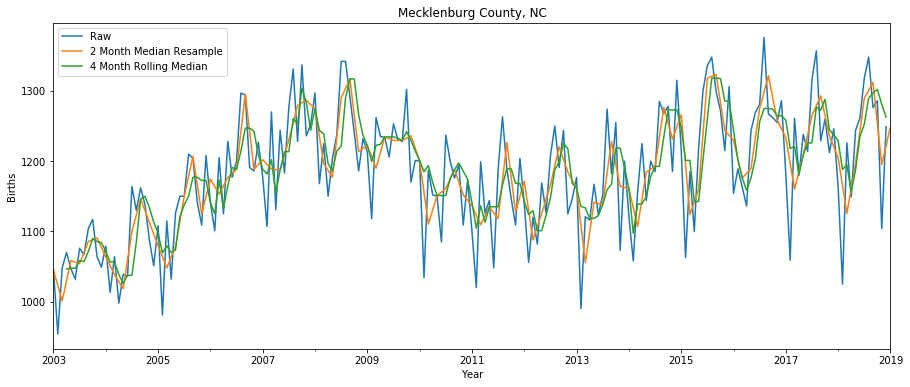

In [38]:
Random_County_Plotter(df, lst_county_codes)

### - 

In [45]:
lst_county_codes = list(df['County Code'].unique())

def Random_County_Plotter_Annual(df, lst_county_codes):
    
    import random 
    n = random.randrange(0, len(lst_county_codes))
    
    df_county = df[df['County Code']==lst_county_codes[n]]
    
    low = df_county_code['Year'].min()
    high = df_county_code['Year'].max()
    lst_yrs = list(range(low, high+1))
    
    plt.figure(figsize=(20,10))

    for yr in lst_yrs:
        x = df_county_code[df_county_code['Year'] == yr]['Month Code']
        y = df_county_code[df_county_code['Year'] == yr]['Births']
        plt.plot(x,y)
    
    plt.xticks(x, labels=df_county_code['Month'].unique(), rotation='45')
    plt.ylabel('Births')
    plt.title(df['County'][n])
    plt.show()

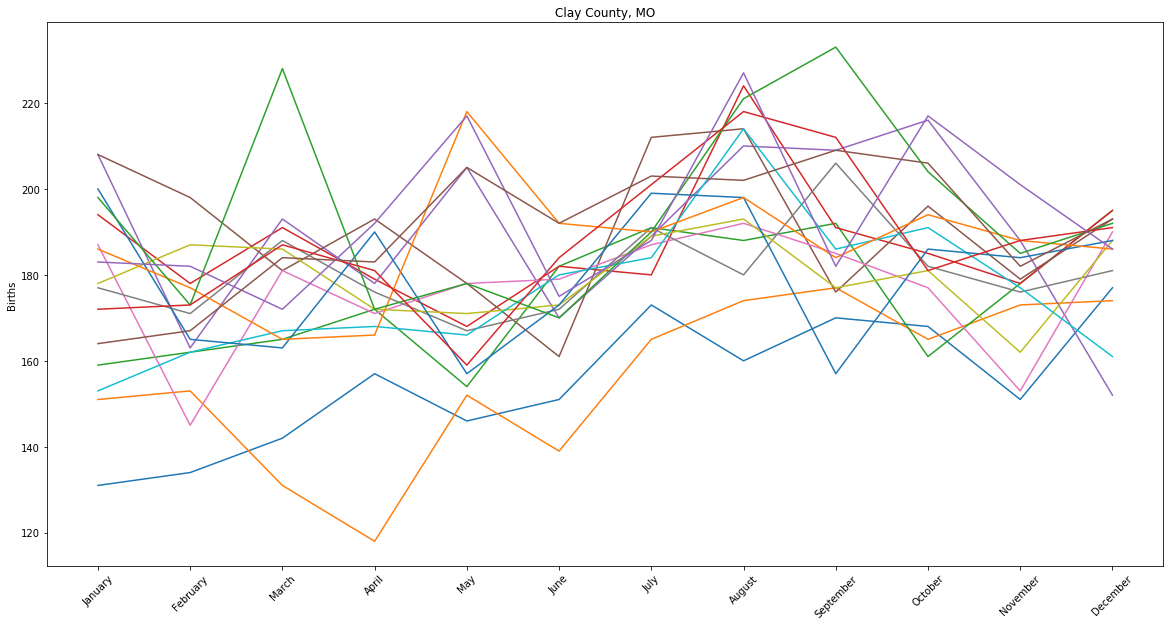

In [46]:
Random_County_Plotter_Annual(df, lst_county_codes)

Text(0.5, 1.0, '')

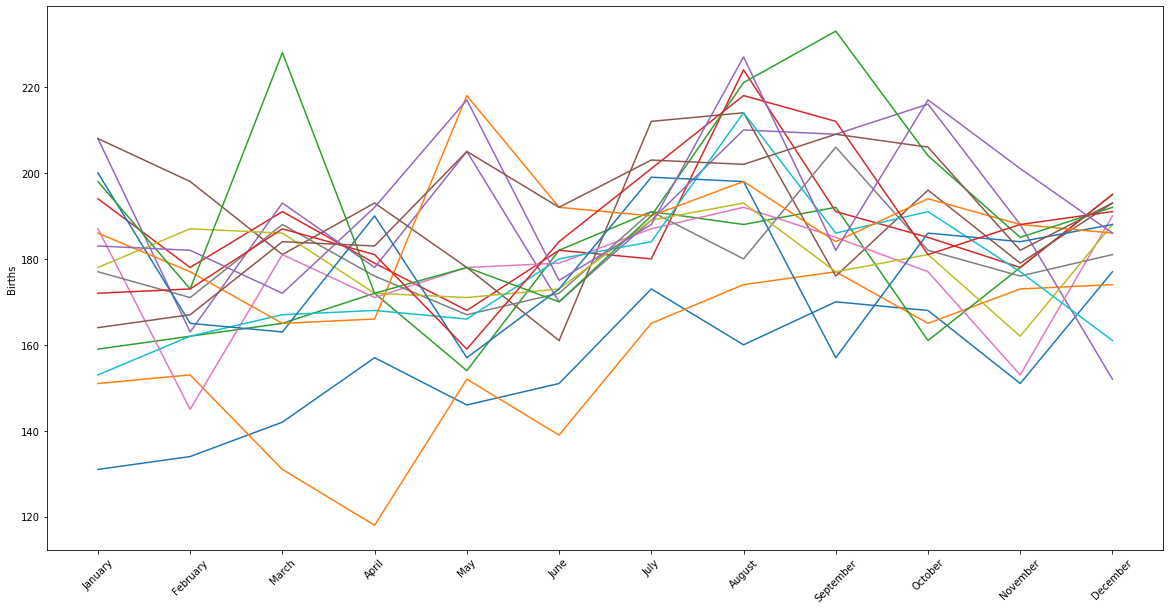

In [40]:
df_county_code = df[df['County Code']==1003]

low = df_county_code['Year'].min()
high = df_county_code['Year'].max()
yrs = list(range(low, high+1))

plt.figure(figsize=(20,10))

for yr in yrs:
    x = df_county_code[df_county_code['Year'] == yr]['Month Code']
    y = df_county_code[df_county_code['Year'] == yr]['Births']
    plt.plot(x,y)

plt.xticks(x, labels=df_county_code['Month'].unique(), rotation='45')
plt.ylabel('Births')
plt.title('')

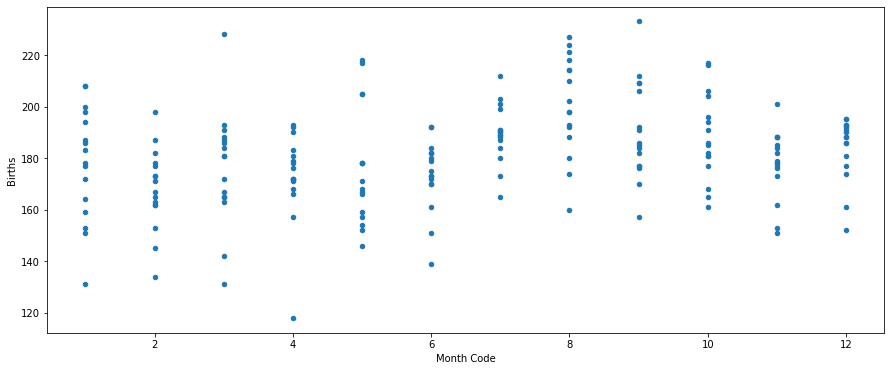

In [19]:
df[df['County Code']==1003].plot(x='Month Code', y='Births', kind = 'scatter', figsize=(15,6))

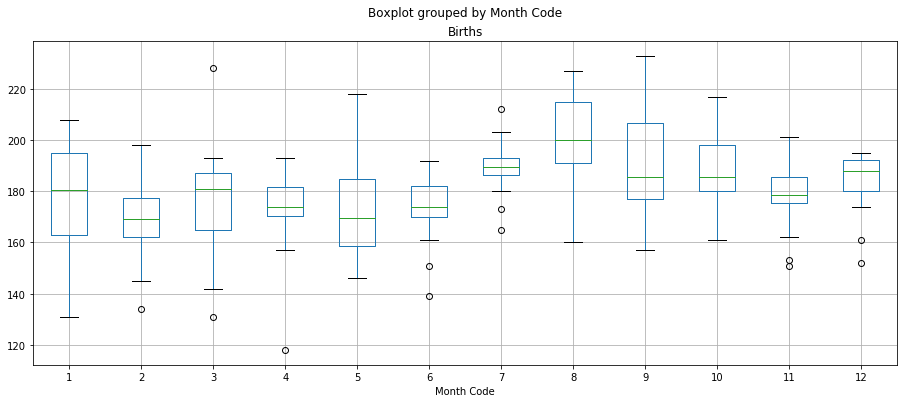

In [18]:
df[df['County Code']==1003].boxplot(column='Births', by='Month Code', figsize=(15,6))

### - 

### - 

### - 

### - 

### - 

### - 

### - 

### - 

### - 

### - 

### - 

### - 

### - 

### - 

### - 

### - 